<a href="https://colab.research.google.com/github/sehgalsakshi/New-Repository/blob/master/Spacy_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center>Spacy Assignment</center>**

SpaCy is free, open-source library for advanced Natural language processing(NLP) in Python.

Suppose you're working with a lot of text, you'll eventually want to know more about it. For example, what's it about? What does the words mean in the context? Who is doing what to whom? What products and compnaies are mentioned in the text? Which texts are simmilar to each other.

spaCy is designed specifically for production use and helps you build applications that process and "understand" large volume of text. It can be used to build information extraction or natural language processing systems, or to pre-process text for deep learning.

In [3]:
!pip install spacy

In [ ]:
import spacy 
nlp = spacy.load('en_core_web_sm') 
import re
import spacy
from spacy.tokenizer import Tokenizer

# **Question 1.** Create a python program to find it out the Named entity recognition(NER) from the following sentence using spacy and visualizing those parts in sentence.


In [11]:
def find_ner(sentence):
  doc = nlp(sentence) 
  if doc.ents:
    for ent in doc.ents: 
      print(ent.text, ent.start_char, ent.end_char, ent.label_)
  else:
    print('No named entity found')

In [12]:
sentence = "I saw a kitten eating chicken in the kitchen" 
find_ner(sentence)

No named entity found


No named entity here
Thus need to create custom ner

# Custom NER Model

In [44]:
# Load a spacy model and check if it has ner
nlp=spacy.load('en_core_web_sm')
nlp.pipe_names

['tagger', 'parser', 'ner']

In [45]:
# Getting the pipeline component
ner=nlp.get_pipe("ner")

In [97]:
# training data
TRAIN_DATA = [
    ("i love dogs.", {"entities": [(7, 11, "ANIMAL")]}),
    ("this kitten is cute.", {"entities": [(5, 11, "ANIMAL")]}),
    ("i like eating chicken.", {"entities":[(14, 21, "FOOD")]}),
    ("she makes tasty pasta.", {"entities":[(16, 21, "FOOD")]}),
    ("chicken is my favourite food.", {"entities":[(0, 7, "FOOD")]}),
    ('go to the kitchen.', {"entities":[(10, 17, "ROOM")]}),
    ('my dining room is very huge.', {"entities":[(3, 14, "ROOM")]}),
    ("my dog sleeps in the bedroom.", {"entities": [(3, 6, "ANIMAL"), (21, 28, "ROOM")]}),
    ("cats and kittens belong to same family.", {"entities": [(0, 4, "ANIMAL"), (9, 16, "ANIMAL")]}),
]

In [98]:
# Adding labels to the `ner`
for _, annotations in TRAIN_DATA:
  for ent in annotations.get("entities"):
    ner.add_label(ent[2])

In [99]:
# Disable pipeline components you dont need to change
pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]
unaffected_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

In [100]:
# Import requirements
import random
from spacy.util import minibatch, compounding
from pathlib import Path

# TRAINING THE MODEL
with nlp.disable_pipes(*unaffected_pipes):

  # Training for 30 iterations
  for iteration in range(30):

    # shuufling examples  before every iteration
    random.shuffle(TRAIN_DATA)
    losses = {}
    # batch up the examples using spaCy's minibatch
    batches = minibatch(TRAIN_DATA, size=compounding(4.0, 32.0, 1.001))
    for batch in batches:
        texts, annotations = zip(*batch)
        nlp.update(
                    texts,  # batch of texts
                    annotations,  # batch of annotations
                    drop=0,  # dropout - make it harder to memorise data
                    losses=losses,
                )
        print("Losses", losses)

Losses {'ner': 2.538770775828425e-07}
Losses {'ner': 4.518758647265031e-07}
Losses {'ner': 4.845808563309472e-07}
Losses {'ner': 2.2460893189801823e-07}
Losses {'ner': 4.1393215860496824e-07}
Losses {'ner': 4.612948770188474e-07}
Losses {'ner': 1.8232531218131953e-07}
Losses {'ner': 3.3278480948695233e-07}
Losses {'ner': 4.395762846346775e-07}
Losses {'ner': 2.2350363648726557e-07}
Losses {'ner': 3.666098307153476e-07}
Losses {'ner': 4.2072998029593633e-07}
Losses {'ner': 2.2492347540037372e-07}
Losses {'ner': 3.5085110483557003e-07}
Losses {'ner': 4.0197266775506696e-07}
Losses {'ner': 1.5152185328659584e-07}
Losses {'ner': 3.334210472161203e-07}
Losses {'ner': 3.832212479466801e-07}
Losses {'ner': 1.5157271260335392e-07}
Losses {'ner': 3.308610763141928e-07}
Losses {'ner': 3.669448470355885e-07}
Losses {'ner': 2.0956431523444508e-07}
Losses {'ner': 3.3981457159271145e-07}
Losses {'ner': 3.5284085744130556e-07}
Losses {'ner': 1.5993907287459308e-07}
Losses {'ner': 2.9259160627681524e-

Drop out is kept 0 since we have very less data and if we add regularization here, it would start underfitting

In [101]:
for text, _ in TRAIN_DATA:
        doc = nlp(text)
        print("Entities", [(ent.text, ent.label_) for ent in doc.ents])
        print("Tokens", [(t.text, t.ent_type_, t.ent_iob) for t in doc])

Entities [('kitten', 'ANIMAL')]
Tokens [('this', '', 2), ('kitten', 'ANIMAL', 3), ('is', '', 2), ('cute', '', 2), ('.', '', 2)]
Entities [('dining room', 'ROOM')]
Tokens [('my', '', 2), ('dining', 'ROOM', 3), ('room', 'ROOM', 1), ('is', '', 2), ('very', '', 2), ('huge', '', 2), ('.', '', 2)]
Entities [('chicken', 'FOOD')]
Tokens [('chicken', 'FOOD', 3), ('is', '', 2), ('my', '', 2), ('favourite', '', 2), ('food', '', 2), ('.', '', 2)]
Entities [('cats', 'ANIMAL'), ('kittens', 'ANIMAL')]
Tokens [('cats', 'ANIMAL', 3), ('and', '', 2), ('kittens', 'ANIMAL', 3), ('belong', '', 2), ('to', '', 2), ('same', '', 2), ('family', '', 2), ('.', '', 2)]
Entities [('dogs', 'ANIMAL')]
Tokens [('i', '', 2), ('love', '', 2), ('dogs', 'ANIMAL', 3), ('.', '', 2)]
Entities [('pasta', 'FOOD')]
Tokens [('she', '', 2), ('makes', '', 2), ('tasty', '', 2), ('pasta', 'FOOD', 3), ('.', '', 2)]
Entities [('chicken', 'FOOD')]
Tokens [('i', '', 2), ('like', '', 2), ('eating', '', 2), ('chicken', 'FOOD', 3), ('.', '

# Generating custom named entity
for I saw a kitten eating chicken in the kitchen
Also performed visualization using displacy

In [102]:
doc = nlp('I saw a kitten eating chicken in the kitchen')
print("Entities", [(ent.text, ent.label_) for ent in doc.ents])

Entities [('kitten', 'ANIMAL'), ('chicken', 'FOOD'), ('kitchen', 'ROOM')]


In [121]:
displacy.render(doc, style='ent', jupyter=True, options={'distance': 90})

# **Question 3.** Visualize sentences including parts of speech(pos) tagging and linguistic annotation in it by using spacy library.

In [120]:
from spacy import displacy
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

# **Question 2.** Find out the similar words from following list using spacy library.

["ship car truck motor-bike jeep hagskdshd"]

In [188]:
text = "ship car truck motor-bike jeep hagskdshd"

In [128]:
import spacy.cli
spacy.cli.download("en_core_web_md")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [207]:
#Loading medium model
nlp=spacy.load('en_core_web_md')
tokens = nlp(text)

for token in tokens:
  print(token)

ship
car
truck
motor
-
bike
jeep
hagskdshd


## We can see it is separating motor-bike into 2 words
Let's add custom tokenizer to not separate words on hyphen

In [208]:
infixes = tuple([r"'s\b", r"(?<!\d)\.(?!\d)"]) +  nlp.Defaults.prefixes
infix_re = spacy.util.compile_infix_regex(infixes)

def custom_tokenizer(nlp):
    return Tokenizer(nlp.vocab, infix_finditer=infix_re.finditer)

nlp.tokenizer = custom_tokenizer(nlp)

In [209]:
#let's check if word is in dictionary
tokens = nlp(text)
for token in tokens:
  print(token, token.vector_norm, token.is_oov)

ship 6.814103 False
car 7.149045 False
truck 6.972262 False
motor-bike 0.0 True
jeep 7.065664 False
hagskdshd 0.0 True


Since "motor-bike" is added by us and thus it's an out of vocab word.

Let's add it to vocab. We know it's same as motor cycle, let's place it close to it's vector

In [218]:
motor_cycle = nlp('motorcycle')
motor_cycle_vec = None
for token in motor_cycle:
  motor_cycle_vec = token.vector
  print(token.vector_norm, token.is_oov)

7.230161 False


In [211]:
vocab = nlp.vocab

In [223]:
vocab.set_vector('motor-bike',motor_cycle_vec+0.01)

In [224]:
nlp.vocab.has_vector('motor-bike')

True

In [235]:
#let's check if word is in dictionary
tokens = nlp(text)
for token in tokens:
  print(token, token.vector_norm, token.has_vector) 


ship 6.814103 True
car 7.149045 True
truck 6.972262 True
motor-bike 7.2384076 True
jeep 7.065664 True
hagskdshd 0.0 False


## now we can check for similarity

In [244]:
tokens = nlp(text)
dict_pair = {}
for token in tokens:
  if token.has_vector: #checking if token is out of vocab
    for token_2 in tokens:
      if token != token_2 and token_2.has_vector:  #since same words always have 1 similarity
        dict_pair[(token, token_2)]  = (token_2, token)
        if (token_2, token) in dict_pair.keys():
          print(token.text, token_2.text, token.similarity(token_2))

car ship 0.2815587
truck ship 0.35367906
truck car 0.71134394
motor-bike ship 0.23046897
motor-bike car 0.5880586
motor-bike truck 0.5752777
jeep ship 0.21036273
jeep car 0.5652786
jeep truck 0.6284901
jeep motor-bike 0.5060827




#**Question 4.** What is Word vector? And, how could you convert words into vector?

## <center>Word2Vec and Word Vectors</center>
Word2Vec is an unsupervised technique for modelling word embeddings in a way that words similar to each other are placed on similar positions in word vector.
<b>Word Vector?</b> What is that?
<ul>
<li>Before word vector, we had (still have!) plain and simple word embeddings where each word is represented by a <b>sparse matrix</b> representation, represented by 1 (or the count of specific word) corresponding to the document it is present in.</li>
<li>Word Embedding was a crude way of representing words but was somewhat improved using approaches like <b>TF-IDF</b> which emphasizes on repetition of word within document but rarity within corpus to show the importance. </li>
<li>Word embeddings just told us about the presence or absence of word but what gives meaning to a sentence is presence of a word with respect to other words</li>
<li>This is exactly what word vector does! Word vector is just a vector that explains a meaning of the word. </li>
<li>It does so by having different features to represent a word. These features are the context words that may or may not be surrounding the given word.</li>
<li><b>a word vector is a row of real valued numbers (as opposed to dummy numbers) where each point captures a dimension of the word’s meaning and where semantically similar words have similar vectors.</b></li>
<li>Since it's the mathematical representation of <b>word meanings</b>, hence there should be a way to extract mathematical equations for word meanings</li>
<li> Using word vectors we can get equations like <i>King - Man + Woman = Queen </i></li> 
</ul>

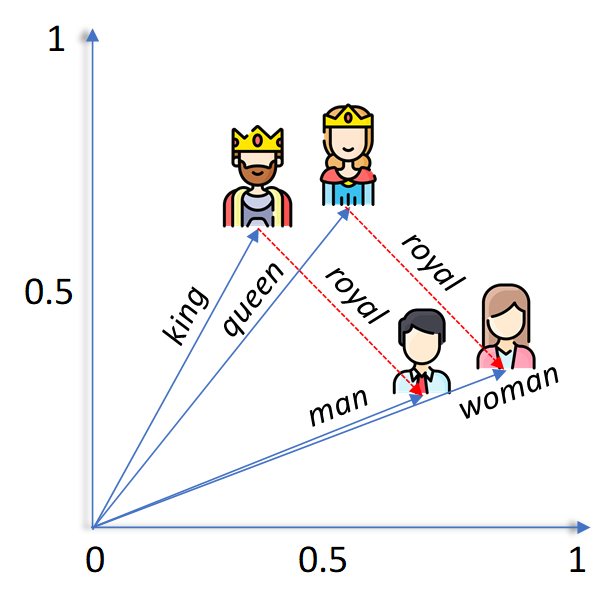

### Word Vectors are created using word2vec algorithm
It's a neural network task of generating word embeddings.
Model can be created in 2 ways:



1.   Given a set of sentences (also called corpus) the model loops on the words of each sentence and either tries to use the current word of to predict its neighbors (its context), in which case the method is called **Skip-Gram**
2.   Or it uses each of these contexts to predict the current word, in which case the method is **Continuous Bag of Words (CBOW)**

Basically in this neural network, main task isn't the output layer but getting the hidden layer which gives us word vectors.

Neural Network is like fake task for getting the hidden layer.

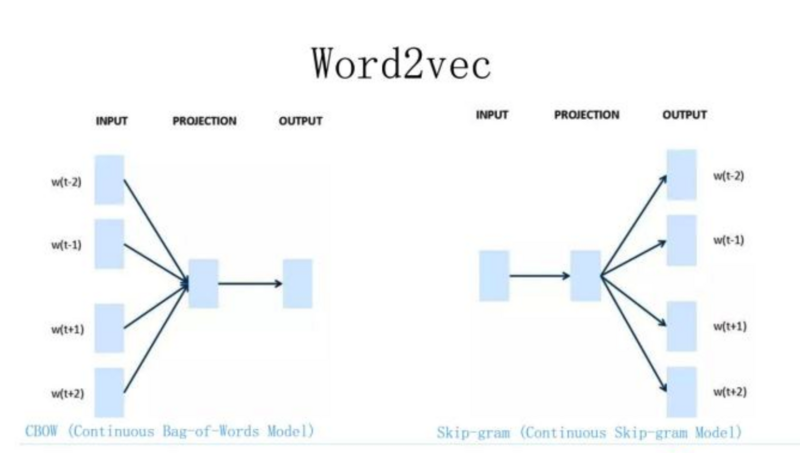

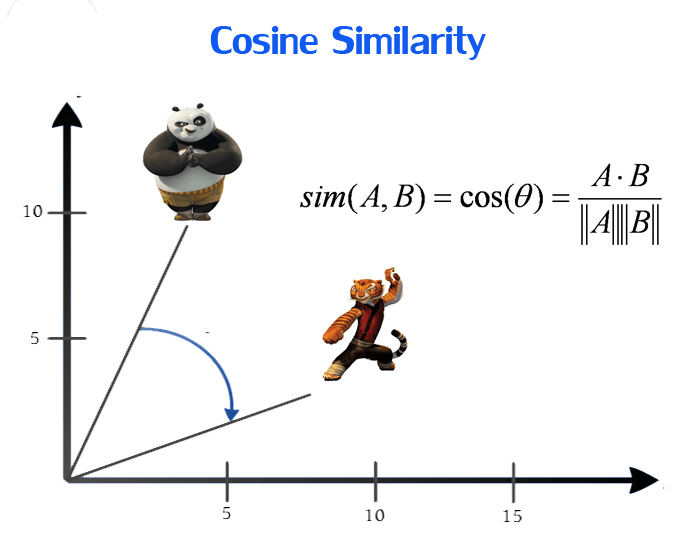

Smaller the angle, more is the similarity!

#**Question 5.** Define Vocab, hashes and lexemes in your own word.

Basically <b>Vocab</b> as the name suggests is Vocabulary (dictionary) for all words in a spacy model. Entity labels like “ORG” and part-of-speech tags like “VERB” are also encoded. Internally, spaCy only “speaks” in hash values.

Now this vocabulary is shared among multiple documents.

And every string is saved as unique hash codes, <b>Hashes</b> since hashes takes up lesser memory than string!

Example of a small vocab having items I like in breakfast may be [1,2,3]
where 1 is coffee, 2 is egg and 3 umm water (because it's very important! :p)
Did you notice, vocab is just numbers, more specifically hashes and not words.

To retrieve word from it's hash or hash from the word, spacy uses a lookup table <b>StringStore</b>.

Our StringStore would be:

*   1. Coffee
*   2. Egg
*   3. Water

Each entry in vocabulary (encoded vocabulary), known as <b>Lexeme</b> contains information about the word, important thing is this information is <b>Context Independent</b>.

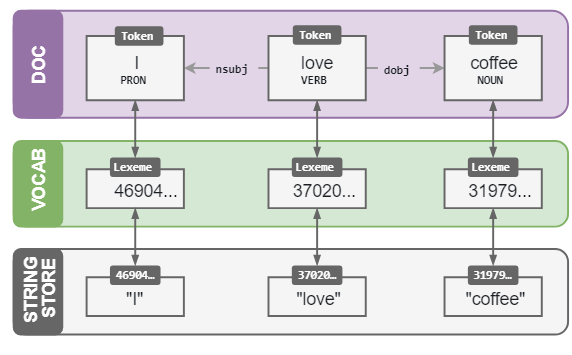

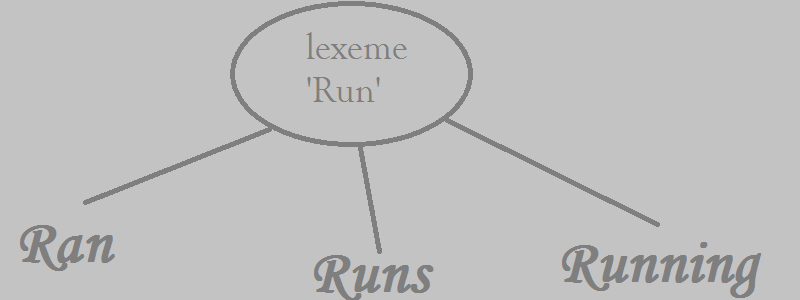


As with the basic property of hashes:
<ul><li> Hash function always creates the same hash for the same word. The mapping of words to hashes doesn’t depend on any state. </li><li>There's no way we can apply a function on hash to decode the word, hashes are irreversible. Only way to retrieve is through StringStore

We cannot apply any function to number 1 in our vocab that would give us "coffee"</li></ul>

Hence all objects should have access to same vocabulary or else spaCy would raise an error.

To prevent this problem, spaCy will also export the Vocab when you save a Doc or nlp object. This will give you the object and its encoded annotations, plus the “key” to decode it.

# 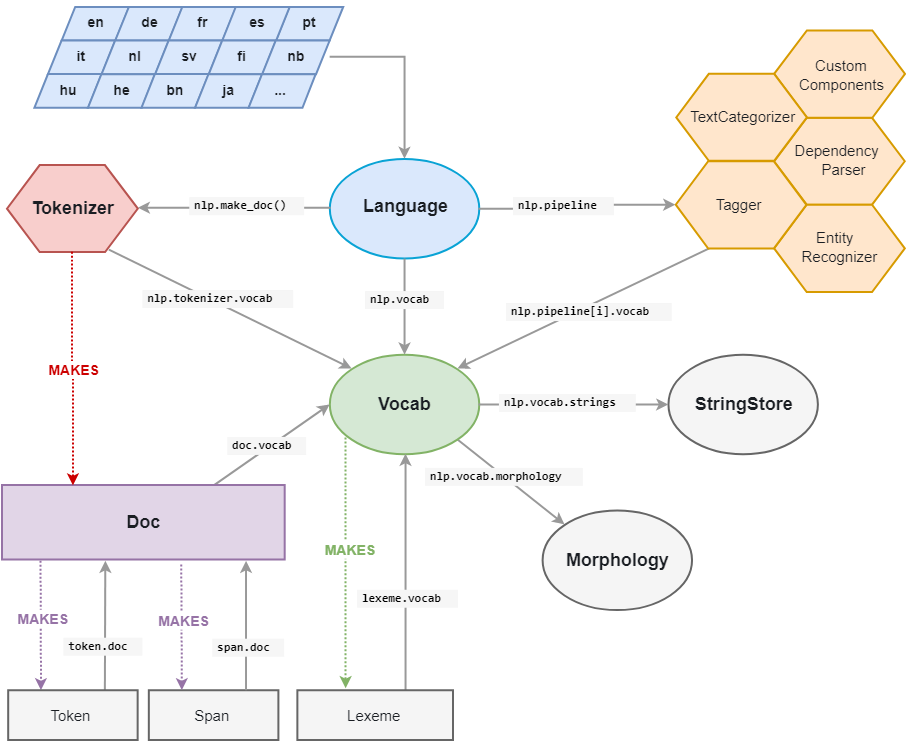